In [293]:
%pip install pandas matplotlib numpy seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [295]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [296]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [297]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [298]:
train_data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Anton Woody,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


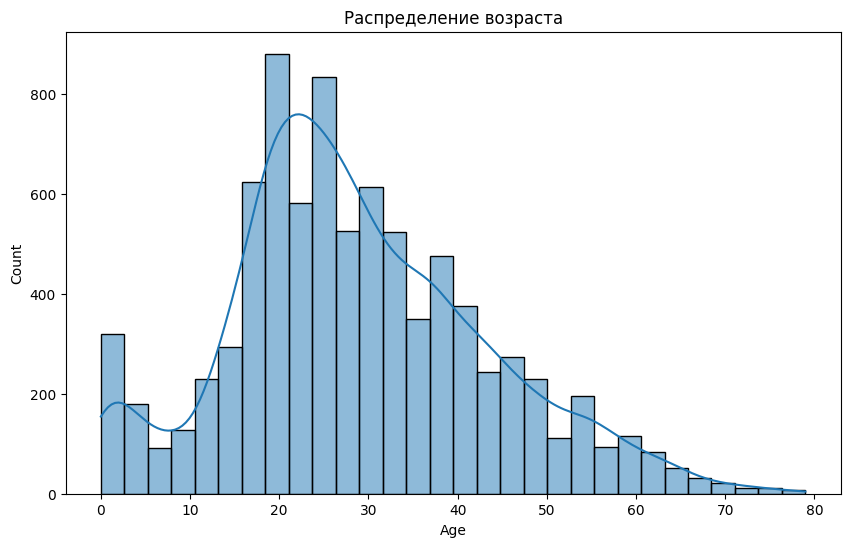

0    24.0
Name: Age, dtype: float64

In [299]:
#Строим график распределения возраста
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.show()

#Выведем моды распределения возраста
train_data['Age'].mode()

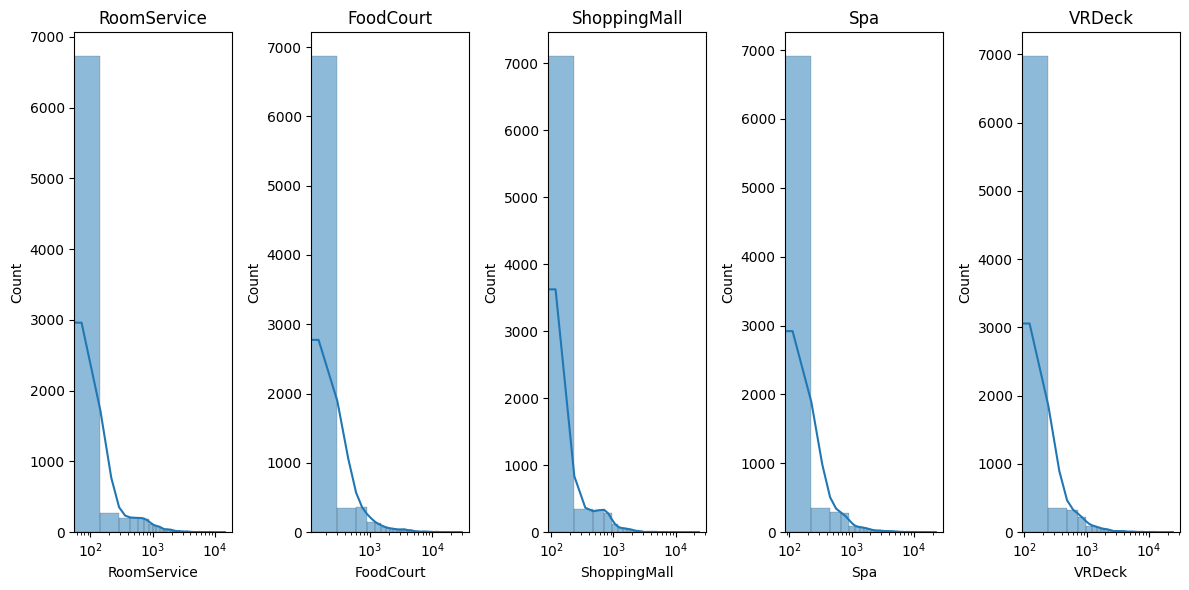

In [300]:
#Строим графики распределения трат на корабле
fig, ax = plt.subplots(1, 5, figsize=(12, 6))

sns.histplot(train_data['RoomService'], bins=100, kde=True, ax=ax[0])
ax[0].set_xscale('log')
ax[0].set_title('RoomService')

sns.histplot(train_data['FoodCourt'], bins=100, kde=True, ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_title('FoodCourt')

sns.histplot(train_data['ShoppingMall'], bins=100, kde=True, ax=ax[2])
ax[2].set_xscale('log')
ax[2].set_title('ShoppingMall')

sns.histplot(train_data['Spa'], bins=100, kde=True, ax=ax[3])
ax[3].set_xscale('log')
ax[3].set_title('Spa')

sns.histplot(train_data['VRDeck'], bins=100, kde=True, ax=ax[4])
ax[4].set_xscale('log')
ax[4].set_title('VRDeck')

plt.tight_layout()
plt.show()

In [301]:
#Выведем статистическе показатели по тратам на корабле и возрасту

#Медиана
print(train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']].median())

#Среднее + ствндартное отклонение
train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']].describe()

RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
Age             27.0
dtype: float64


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8514.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791,28.827930
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189,14.489021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000,38.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,79.000000


In [302]:
#Вывкдем множества значений по категориальным признакам

categorical_columns = train_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = train_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in PassengerId: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
Unique values in HomePlanet: ['Europa' 'Earth' 'Mars' nan]
Unique values in CryoSleep: [False True nan]
Unique values in Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Unique values in Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Unique values in VIP: [False True nan]
Unique values in Name: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [303]:

categorical_columns = test_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = test_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in PassengerId: ['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']
Unique values in HomePlanet: ['Earth' 'Europa' 'Mars' nan]
Unique values in CryoSleep: [True False nan]
Unique values in Cabin: ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
Unique values in Destination: ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
Unique values in VIP: [False nan True]
Unique values in Name: ['Nelly Carsoning' 'Lerome Peckers' 'Sabih Unhearfus' ... 'Jayrin Pore'
 'Kitakan Conale' 'Lilace Leonzaley']


Категориальные значения соответсвуют => дополнительная обработка при OHE не требуется
___

In [304]:
#Столбцы в которых есть пропущенные значения
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Заполняем пропуски

C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\3323260043.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\3323260043.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

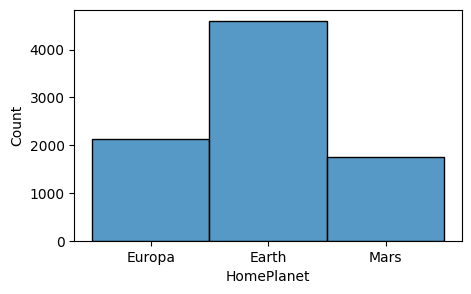

In [305]:
plt.figure(figsize=(5, 3))
sns.histplot(train_data['HomePlanet'])
plt.plot()

#Заполним пропущенные значения в столбце HomePlanet самым частым значением
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)
test_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)

C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\2166735858.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0], inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\2166735858.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_da

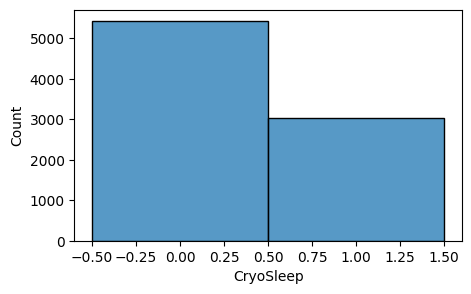

In [306]:
plt.figure(figsize=(5, 3))
sns.histplot(train_data['CryoSleep'], discrete=True)
plt.plot()

#Заполним пропущенные значения в столбце HomePlanet самым частым значением
train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0], inplace=True)
test_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0], inplace=True)

C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\1246490629.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\1246490629.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

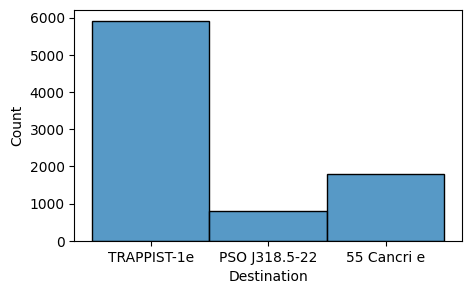

In [307]:
plt.figure(figsize=(5, 3))
sns.histplot(train_data['Destination'])
plt.plot()

#Заполним пропущенные значения в столбце HomePlanet самым частым значением
train_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)
test_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)

C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\1083522585.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mode()[0], inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\1083522585.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

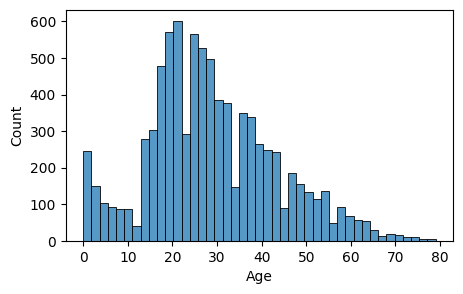

In [308]:
plt.figure(figsize=(5, 3))
sns.histplot(train_data['Age'])
plt.plot()

#Заполним пропущенные значения в столбце HomePlanet самым частым значением
train_data['Age'].fillna(train_data['Age'].mode()[0], inplace=True)
test_data['Age'].fillna(train_data['Age'].mode()[0], inplace=True)

C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\2708185802.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['VIP'].fillna(train_data['VIP'].mode()[0], inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\2708185802.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['VIP'].fi

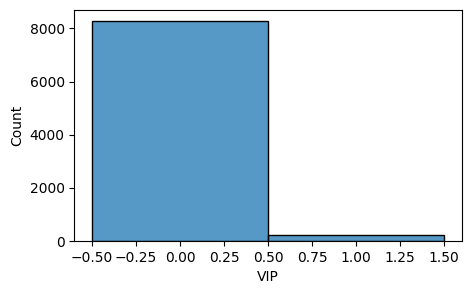

In [309]:
plt.figure(figsize=(5, 3))
sns.histplot(train_data['VIP'], discrete=True)
plt.plot()

#Заполним пропущенные значения в столбце HomePlanet самым частым значением
train_data['VIP'].fillna(train_data['VIP'].mode()[0], inplace=True)
test_data['VIP'].fillna(train_data['VIP'].mode()[0], inplace=True)

In [310]:
#Заменим пропущенные значения в столбцах RoomService, FoodCourt, ShoppingMall, Spa, VRDeck на медиану
train_data['RoomService'].fillna(train_data['RoomService'].median(), inplace=True)
train_data['FoodCourt'].fillna(train_data['FoodCourt'].median(), inplace=True)
train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median(), inplace=True)
train_data['Spa'].fillna(train_data['Spa'].median(), inplace=True)
train_data['VRDeck'].fillna(train_data['VRDeck'].median(), inplace=True)


test_data['RoomService'].fillna(train_data['RoomService'].median(), inplace=True)
test_data['FoodCourt'].fillna(train_data['FoodCourt'].median(), inplace=True)
test_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median(), inplace=True)
test_data['Spa'].fillna(train_data['Spa'].median(), inplace=True)
test_data['VRDeck'].fillna(train_data['VRDeck'].median(), inplace=True)

C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\2502733853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['RoomService'].fillna(train_data['RoomService'].median(), inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\2502733853.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [311]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [312]:
test_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [313]:
train_data.drop("Name", axis=1, inplace=True)
train_data.drop("PassengerId", axis=1, inplace=True)

test_data.drop("Name", axis=1, inplace=True)
test_data.drop("PassengerId", axis=1, inplace=True)

In [314]:
#Разобьем столбец Cabin на три столбца по /
train_data['Cabin_1'] = train_data['Cabin'].str.split('/').str[0]
train_data['Cabin_2'] = train_data['Cabin'].str.split('/').str[1]
train_data['Cabin_3'] = train_data['Cabin'].str.split('/').str[2]
train_data['Cabin_None'] = train_data['Cabin'].apply(lambda x: True if pd.isnull(x) else False)

train_data.drop("Cabin", axis=1, inplace=True)


test_data['Cabin_1'] = test_data['Cabin'].str.split('/').str[0]
test_data['Cabin_2'] = test_data['Cabin'].str.split('/').str[1]
test_data['Cabin_3'] = test_data['Cabin'].str.split('/').str[2]
test_data['Cabin_None'] = test_data['Cabin'].apply(lambda x: True if pd.isnull(x) else False)

test_data.drop("Cabin", axis=1, inplace=True)


train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3,Cabin_None
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,False
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,False
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,False


In [315]:
#Переведем столбец Cabin_2 в числовой формат
train_data['Cabin_2'] = pd.to_numeric(train_data['Cabin_2'], errors='coerce')

#Заполним пропущенные значения в столбце Cabin_2 медианой
train_data['Cabin_2'].fillna(train_data['Cabin_2'].mean(), inplace=True)


test_data['Cabin_2'] = pd.to_numeric(test_data['Cabin_2'], errors='coerce')
test_data['Cabin_2'].fillna(train_data['Cabin_2'].mean(), inplace=True)

C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\884766278.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin_2'].fillna(train_data['Cabin_2'].mean(), inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_1848\884766278.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [316]:
#OHE для категориальных признаков
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3'])
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3'])

train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_2,...,Cabin_1_A,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,Cabin_3_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,...,False,True,False,False,False,False,False,False,True,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.0,...,False,False,False,False,False,True,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,98.0,...,True,False,False,False,False,False,False,False,True,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1499.0,...,False,False,False,False,False,False,True,False,False,True
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1500.0,...,False,False,False,False,False,False,True,False,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,608.0,...,False,False,False,False,True,False,False,False,False,True


In [317]:
train_data.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Cabin_2                      0
Cabin_None                   0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_1_A                    0
Cabin_1_B                    0
Cabin_1_C                    0
Cabin_1_D                    0
Cabin_1_E                    0
Cabin_1_F                    0
Cabin_1_G                    0
Cabin_1_T                    0
Cabin_3_P                    0
Cabin_3_S                    0
dtype: int64

In [318]:
test_data.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Cabin_2                      0
Cabin_None                   0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_1_A                    0
Cabin_1_B                    0
Cabin_1_C                    0
Cabin_1_D                    0
Cabin_1_E                    0
Cabin_1_F                    0
Cabin_1_G                    0
Cabin_1_T                    0
Cabin_3_P                    0
Cabin_3_S                    0
dtype: int64

In [319]:
#Проверим остались ли нечисловые столбцы
train_data.select_dtypes(include=['object']).columns

Index([], dtype='object')

___

In [320]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   Cabin_2                    8693 non-null   float64
 10  Cabin_None                 8693 non-null   bool   
 11  HomePlanet_Earth           8693 non-null   bool   
 12  HomePlanet_Europa          8693 non-null   bool   
 13  HomePlanet_Mars            8693 non-null   bool 

In [321]:
#Создадим новые фичи
train_data['TotalSpent'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']

#Добавим столбцец с группами по Age
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '18-30', '30-45', '45-60', '60-100'])

train_data = pd.get_dummies(train_data, columns=['AgeGroup'])



test_data['TotalSpent'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '18-30', '30-45', '45-60', '60-100'])
test_data = pd.get_dummies(test_data, columns=['AgeGroup'])

___

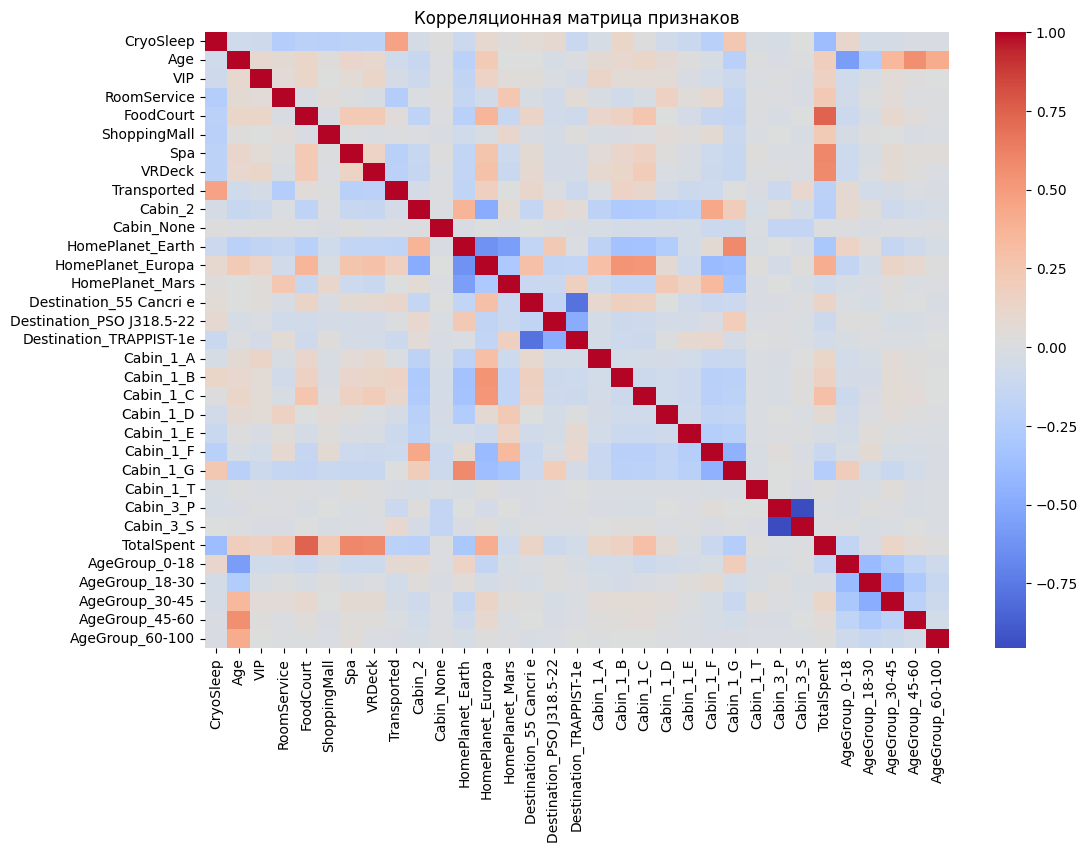

In [322]:
#Посмотрим на корреляцию между признаками 
correlation_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [323]:
#Есть ли корреляция больше 0.8?

high_correlation = correlation_matrix[(abs(correlation_matrix) > 0.8) & (correlation_matrix != 1.0)]

# Выводим пары признаков с корреляцией больше 0.8
high_corr_pairs = high_correlation.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr_pairs)

   Feature 1  Feature 2  Correlation
0  Cabin_3_P  Cabin_3_S    -0.955237
1  Cabin_3_S  Cabin_3_P    -0.955237


In [324]:
#Удалим Cabin_3_S
train_data.drop("Cabin_3_S", axis=1, inplace=True)

In [325]:
numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_2,...,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,TotalSpent,AgeGroup_0-18,AgeGroup_18-30,AgeGroup_30-45,AgeGroup_45-60,AgeGroup_60-100
0,False,0.715553,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,-1.186627,...,False,False,False,True,-0.514066,False,False,True,False,False
1,False,-0.329408,False,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,True,-1.186627,...,True,False,False,False,-0.251479,False,True,False,False,False
2,False,2.039169,True,-0.268001,1.959998,-0.283579,5.695623,-0.219796,False,-1.186627,...,False,False,False,False,3.190333,False,False,False,True,False
3,False,0.297569,False,-0.333105,0.523010,0.336851,2.687176,-0.092818,False,-1.186627,...,False,False,False,False,1.332604,False,False,True,False,False
4,False,-0.886720,False,0.125652,-0.237159,-0.031059,0.231374,-0.261240,True,-1.184651,...,True,False,False,False,-0.124824,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,0.854881,True,-0.333105,3.992336,-0.283579,1.189173,-0.197751,False,-0.992930,...,False,False,False,True,2.531369,False,False,True,False,False
8689,True,-0.747392,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,1.776147,...,False,True,False,False,-0.514066,True,False,False,False,False
8690,False,-0.190079,False,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,True,1.778124,...,False,True,False,False,0.154175,False,True,False,False,False
8691,False,0.227905,False,-0.333105,0.376365,-0.283579,0.043013,2.589576,False,0.015085,...,False,False,False,False,1.140302,False,False,True,False,False


In [326]:
#Корреляция признаков с целевой переменной (Transported)
correlation_with_target = train_data.corr()['Transported'].sort_values(ascending=False)

print(correlation_with_target)

Transported                  1.000000
CryoSleep                    0.460132
HomePlanet_Europa            0.176916
Cabin_1_B                    0.144733
Destination_55 Cancri e      0.108722
Cabin_1_C                    0.108193
AgeGroup_0-18                0.081091
FoodCourt                    0.045583
HomePlanet_Mars              0.019544
Cabin_1_G                    0.016269
ShoppingMall                 0.009391
Destination_PSO J318.5-22    0.000092
Cabin_None                  -0.000340
Cabin_1_A                   -0.002623
AgeGroup_45-60              -0.008090
AgeGroup_60-100             -0.009957
Cabin_1_T                   -0.014568
AgeGroup_30-45              -0.032096
Cabin_1_D                   -0.034046
VIP                         -0.037261
Cabin_2                     -0.044578
AgeGroup_18-30              -0.054115
Age                         -0.074153
Cabin_1_F                   -0.087753
Destination_TRAPPIST-1e     -0.096319
Cabin_1_E                   -0.097965
Cabin_3_P   

In [327]:
#Сохраним подготовленные данные
train_data.to_csv('data/train_prepared.csv', index=False)
test_data.to_csv('data/test_prepared.csv', index=False)
